# **AlexNet**
AlexNet's original paper (we will use the same hyperparameters): [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

In [1]:
#  Importing necessary Libraries

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, \
    MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model


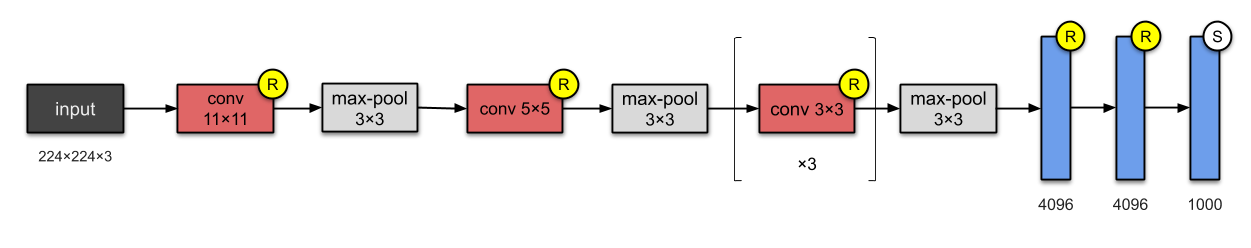

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0     

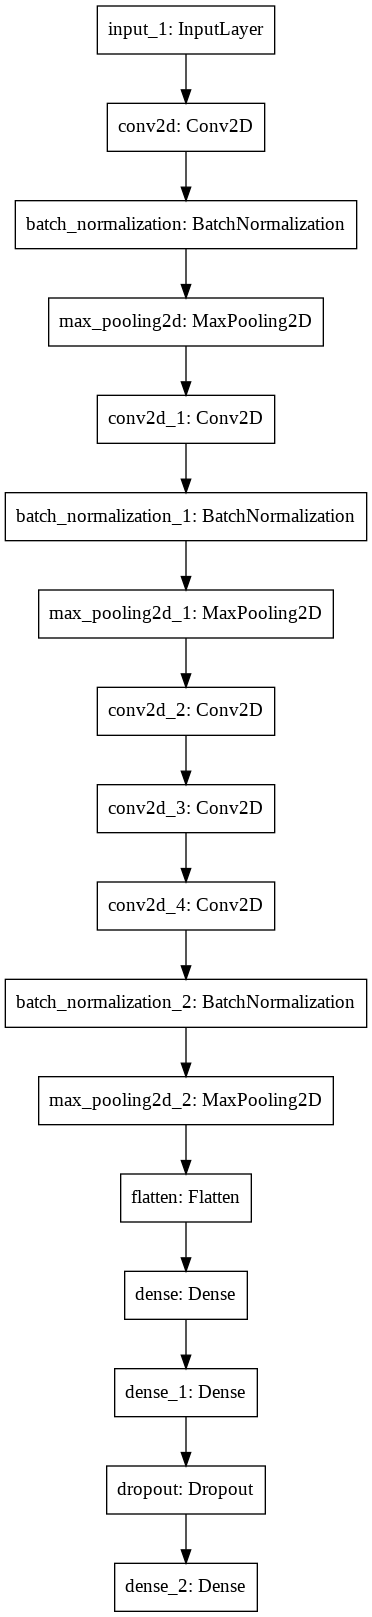

In [2]:
# Input
input = Input(shape=(224, 224, 3))

# 1st block
B1 = Conv2D(filters=96,
          kernel_size=11,
          strides=4,
          padding='same',
          activation='relu')(input)  

B1 = BatchNormalization()(B1)
B1 = MaxPool2D(pool_size=3, strides=2)(B1)

# 2nd block
B2 = Conv2D(filters=256,
          kernel_size=5,
          padding='same',
          activation='relu')(B1)

B2 = BatchNormalization()(B2)
B2 = MaxPool2D(pool_size=3, strides=2)(B2)

# 3th block * 3
B3 = Conv2D(filters=384,
          kernel_size=3,
          padding='same',
          activation='relu')(B2)

B3 = Conv2D(filters=384,
          kernel_size=3,
          padding='same',
          activation='relu')(B3)

B3 = Conv2D(filters=256,
          kernel_size=3,
          padding='same',
          activation='relu')(B3)  

B3 = BatchNormalization()(B3)
B3 = MaxPool2D(pool_size=3, strides=2)(B3)

# Dense layers
DL = Flatten()(B3)
DL = Dense(units=4096, activation='relu')(DL)
DL = Dense(units=4096, activation='relu')(DL)
DL = Dropout(rate=0.5)(DL)

# Output layer
output = Dense(units=1000, activation='softmax')(DL)

# Model
AlexNet_model = Model(inputs=input, outputs=output)

print(AlexNet_model.summary())

from tensorflow.keras.utils import plot_model
print(AlexNet_model.summary())
plot_model(AlexNet_model)